# Data Mining

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## load data

In [2]:
train_df = pd.read_csv("open/train.csv", index_col='ID')
test_df = pd.read_csv("open/test.csv", index_col='ID')
sample_submission_df = pd.read_csv("open/sample_submission.csv")

train_df.shape, test_df.shape, sample_submission_df.shape

((7500, 10), (7500, 9), (7500, 2))

## preprocess data

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, TRAIN_0000 to TRAIN_7499
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Exercise_Duration         7500 non-null   float64
 1   Body_Temperature(F)       7500 non-null   float64
 2   BPM                       7500 non-null   float64
 3   Height(Feet)              7500 non-null   float64
 4   Height(Remainder_Inches)  7500 non-null   float64
 5   Weight(lb)                7500 non-null   float64
 6   Weight_Status             7500 non-null   object 
 7   Gender                    7500 non-null   object 
 8   Age                       7500 non-null   int64  
 9   Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 644.5+ KB


### convert column types

In [4]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [5]:
# # convert gender column type
# train_df['Gender'] = train_df['Gender'].replace('F', 0).replace('M', 1)
# test_df['Gender'] = test_df['Gender'].replace('F', 0).replace('M', 1)

In [6]:
# # convert weight_status column type
# train_df['Weight_Status'] = train_df['Weight_Status'].replace('Normal Weight', 0).replace('Overweight', 1).replace('Obese', 2)
# test_df['Weight_Status'] = test_df['Weight_Status'].replace('Normal Weight', 0).replace('Overweight', 1).replace('Obese', 2)

In [7]:
# x_cols = [x for x in train_df.columns if x != 'Calories_Burned']

In [8]:
# train_x = train_df.loc[:, x_cols]
# train_y = train_df.loc[:, 'Calories_Burned']

# train_x.shape, train_y.shape

# Correlation

<Axes: >

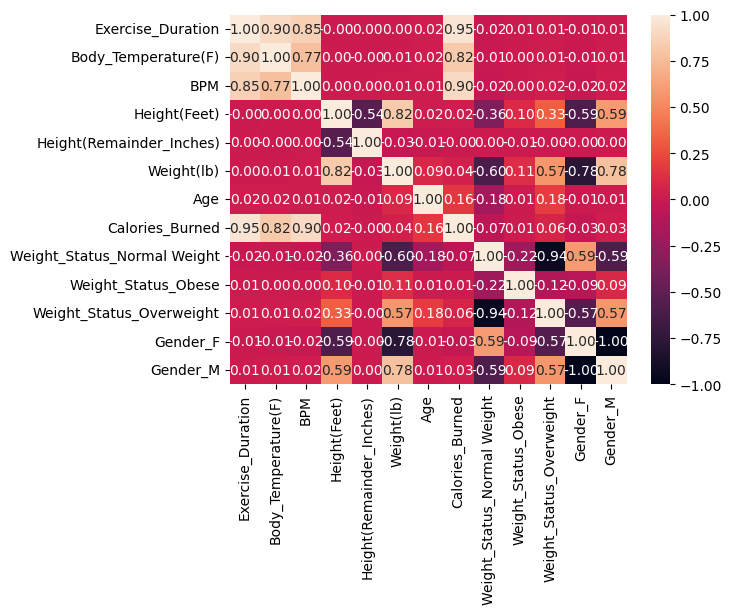

In [9]:
sns.heatmap(train_df.corr(), annot=True, fmt='.2f')

In [10]:
# sns.pairplot(train_df)
# plt.show()

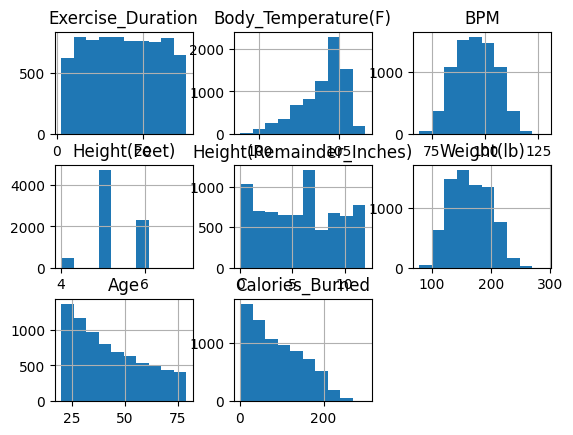

In [11]:
train_df.hist()
plt.show()

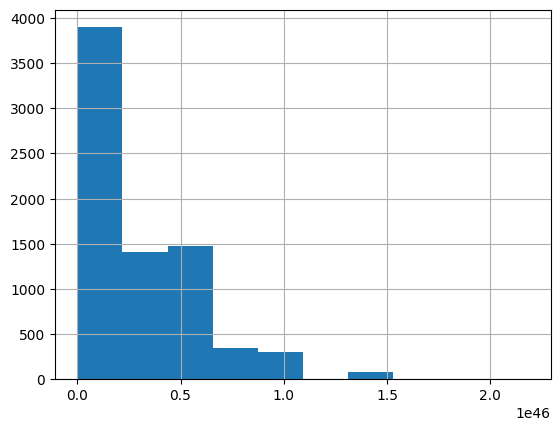

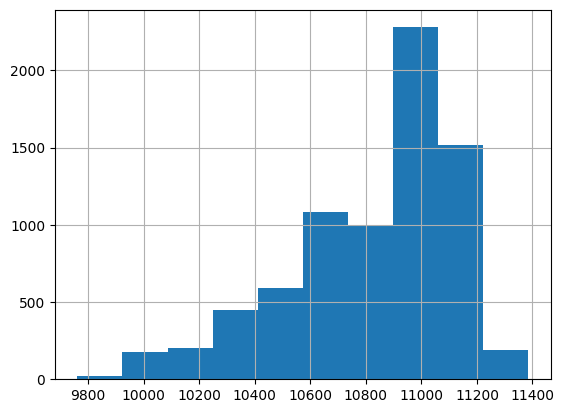

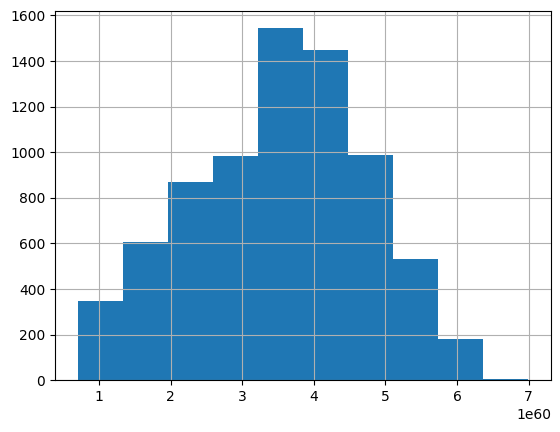

In [12]:
np.expm1(train_df['Body_Temperature(F)']).hist()
plt.show()

(train_df['Body_Temperature(F)']**2).hist()
plt.show()

(train_df['Body_Temperature(F)']**30).hist()
plt.show()

<Axes: >

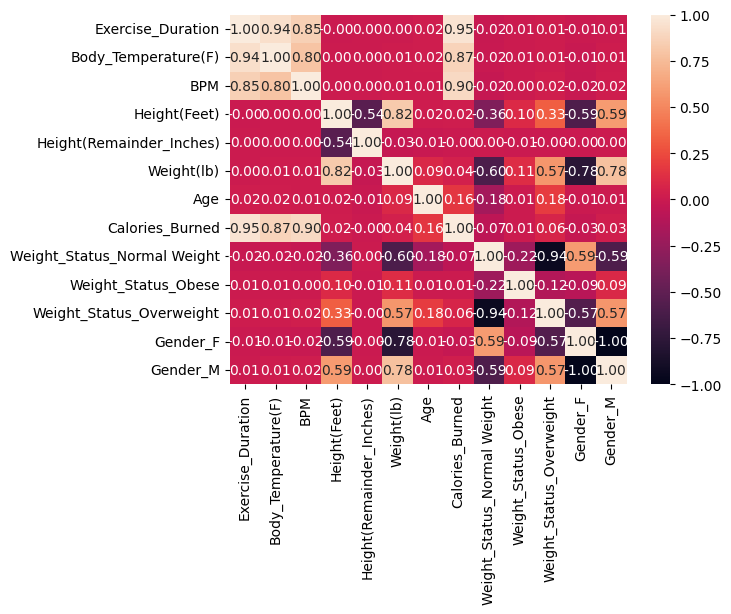

In [13]:
train_df['Body_Temperature(F)'] = train_df['Body_Temperature(F)']**30
sns.heatmap(train_df.corr(), annot=True, fmt='.2f')

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


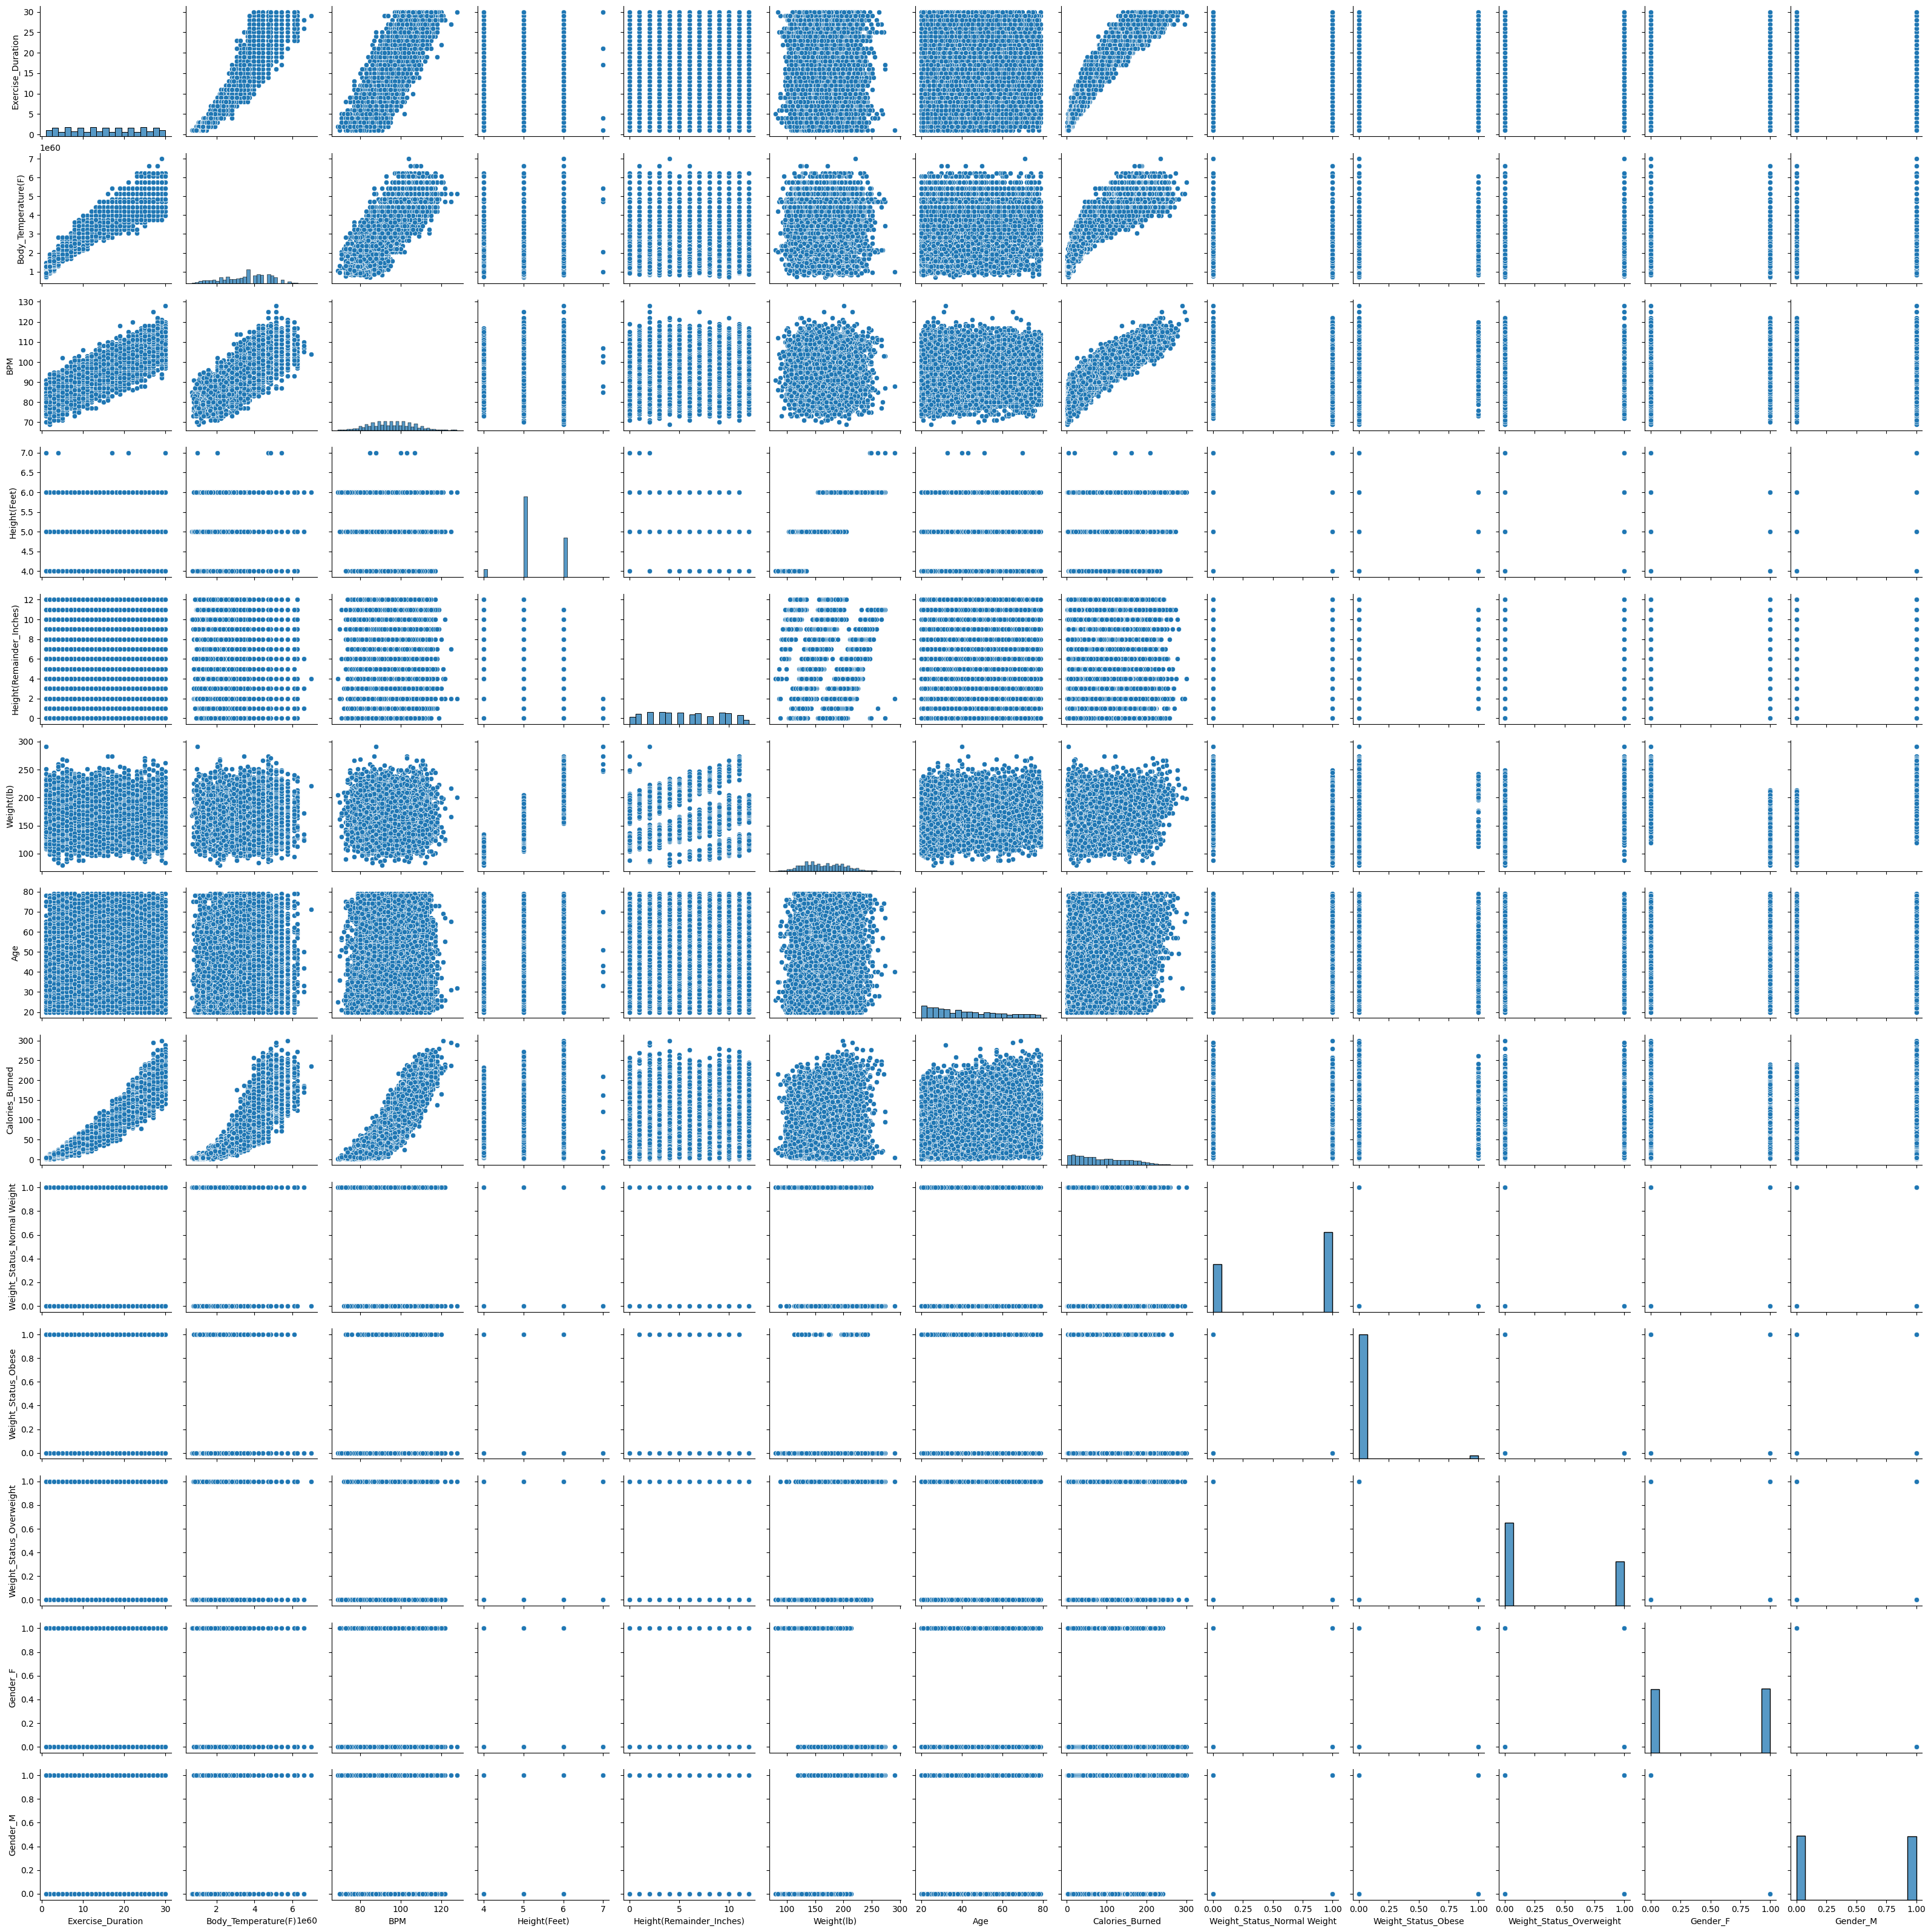

In [14]:
sns.pairplot(train_df)
plt.show()

In [15]:
def convert_units(weight_lb, height_feet, height_inches):
    weight_kg = weight_lb/2.205
    height_m = height_feet/3.281 + height_inches/39.37

    bmi = weight_kg/(height_m**2)
    return weight_kg, height_m, bmi

In [16]:
weight_kg, height_m, bmi = convert_units(
    train_df['Weight(lb)'], train_df['Height(Feet)'], train_df['Height(Remainder_Inches)'])

train_df['height'] = height_m
train_df['weight'] = weight_kg
train_df['bmi'] = bmi

train_df.drop(columns=['Weight(lb)', 'Height(Feet)', 'Height(Remainder_Inches)'], inplace=True)

In [17]:
weight_kg, height_m, bmi = convert_units(
    test_df['Weight(lb)'], test_df['Height(Feet)'], test_df['Height(Remainder_Inches)'])

test_df['height'] = height_m
test_df['weight'] = weight_kg
test_df['bmi'] = bmi

test_df.drop(columns=['Weight(lb)', 'Height(Feet)', 'Height(Remainder_Inches)'], inplace=True)

## BMR
 * 남자: 66.5 + (13.75*체중) + (5.003*키cm) - (6.75*age)
 * 여자: 655.1 + (9.563*체중) + (1.850*키cm) - (4.676*age)

In [18]:
train_df.loc[train_df['Gender_F'], 'BMR'] = 655.1 +\
    (train_df.loc[train_df['Gender_F'], 'weight']*9.563) +\
    (train_df.loc[train_df['Gender_F'], 'height']*100*1.850) +\
    (train_df.loc[train_df['Gender_F'], 'Age']*4.676)

In [19]:
train_df.loc[train_df['Gender_M'], 'BMR'] = 66.5 +\
    (train_df.loc[train_df['Gender_M'], 'weight']*13.75) +\
    (train_df.loc[train_df['Gender_M'], 'height']*100*5.003) +\
    (train_df.loc[train_df['Gender_M'], 'Age']*6.75)

In [20]:
test_df.loc[test_df['Gender_F'], 'BMR'] = 655.1 +\
    (test_df.loc[test_df['Gender_F'], 'weight']*9.563) +\
    (test_df.loc[test_df['Gender_F'], 'height']*100*1.850) +\
    (test_df.loc[test_df['Gender_F'], 'Age']*4.676)

In [21]:
test_df.loc[test_df['Gender_M'], 'BMR'] = 66.5 +\
    (test_df.loc[test_df['Gender_M'], 'weight']*13.75) +\
    (test_df.loc[test_df['Gender_M'], 'height']*100*5.003) +\
    (test_df.loc[test_df['Gender_M'], 'Age']*6.75)

<Axes: >

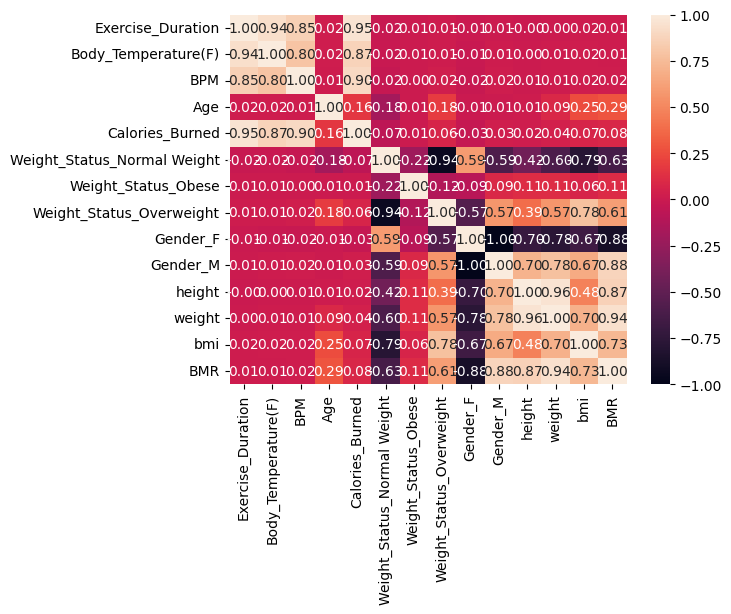

In [22]:
# train_df['Body_Temperature(F)'] = train_df['Body_Temperature(F)']**30
sns.heatmap(train_df.corr(), annot=True, fmt='.2f')

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


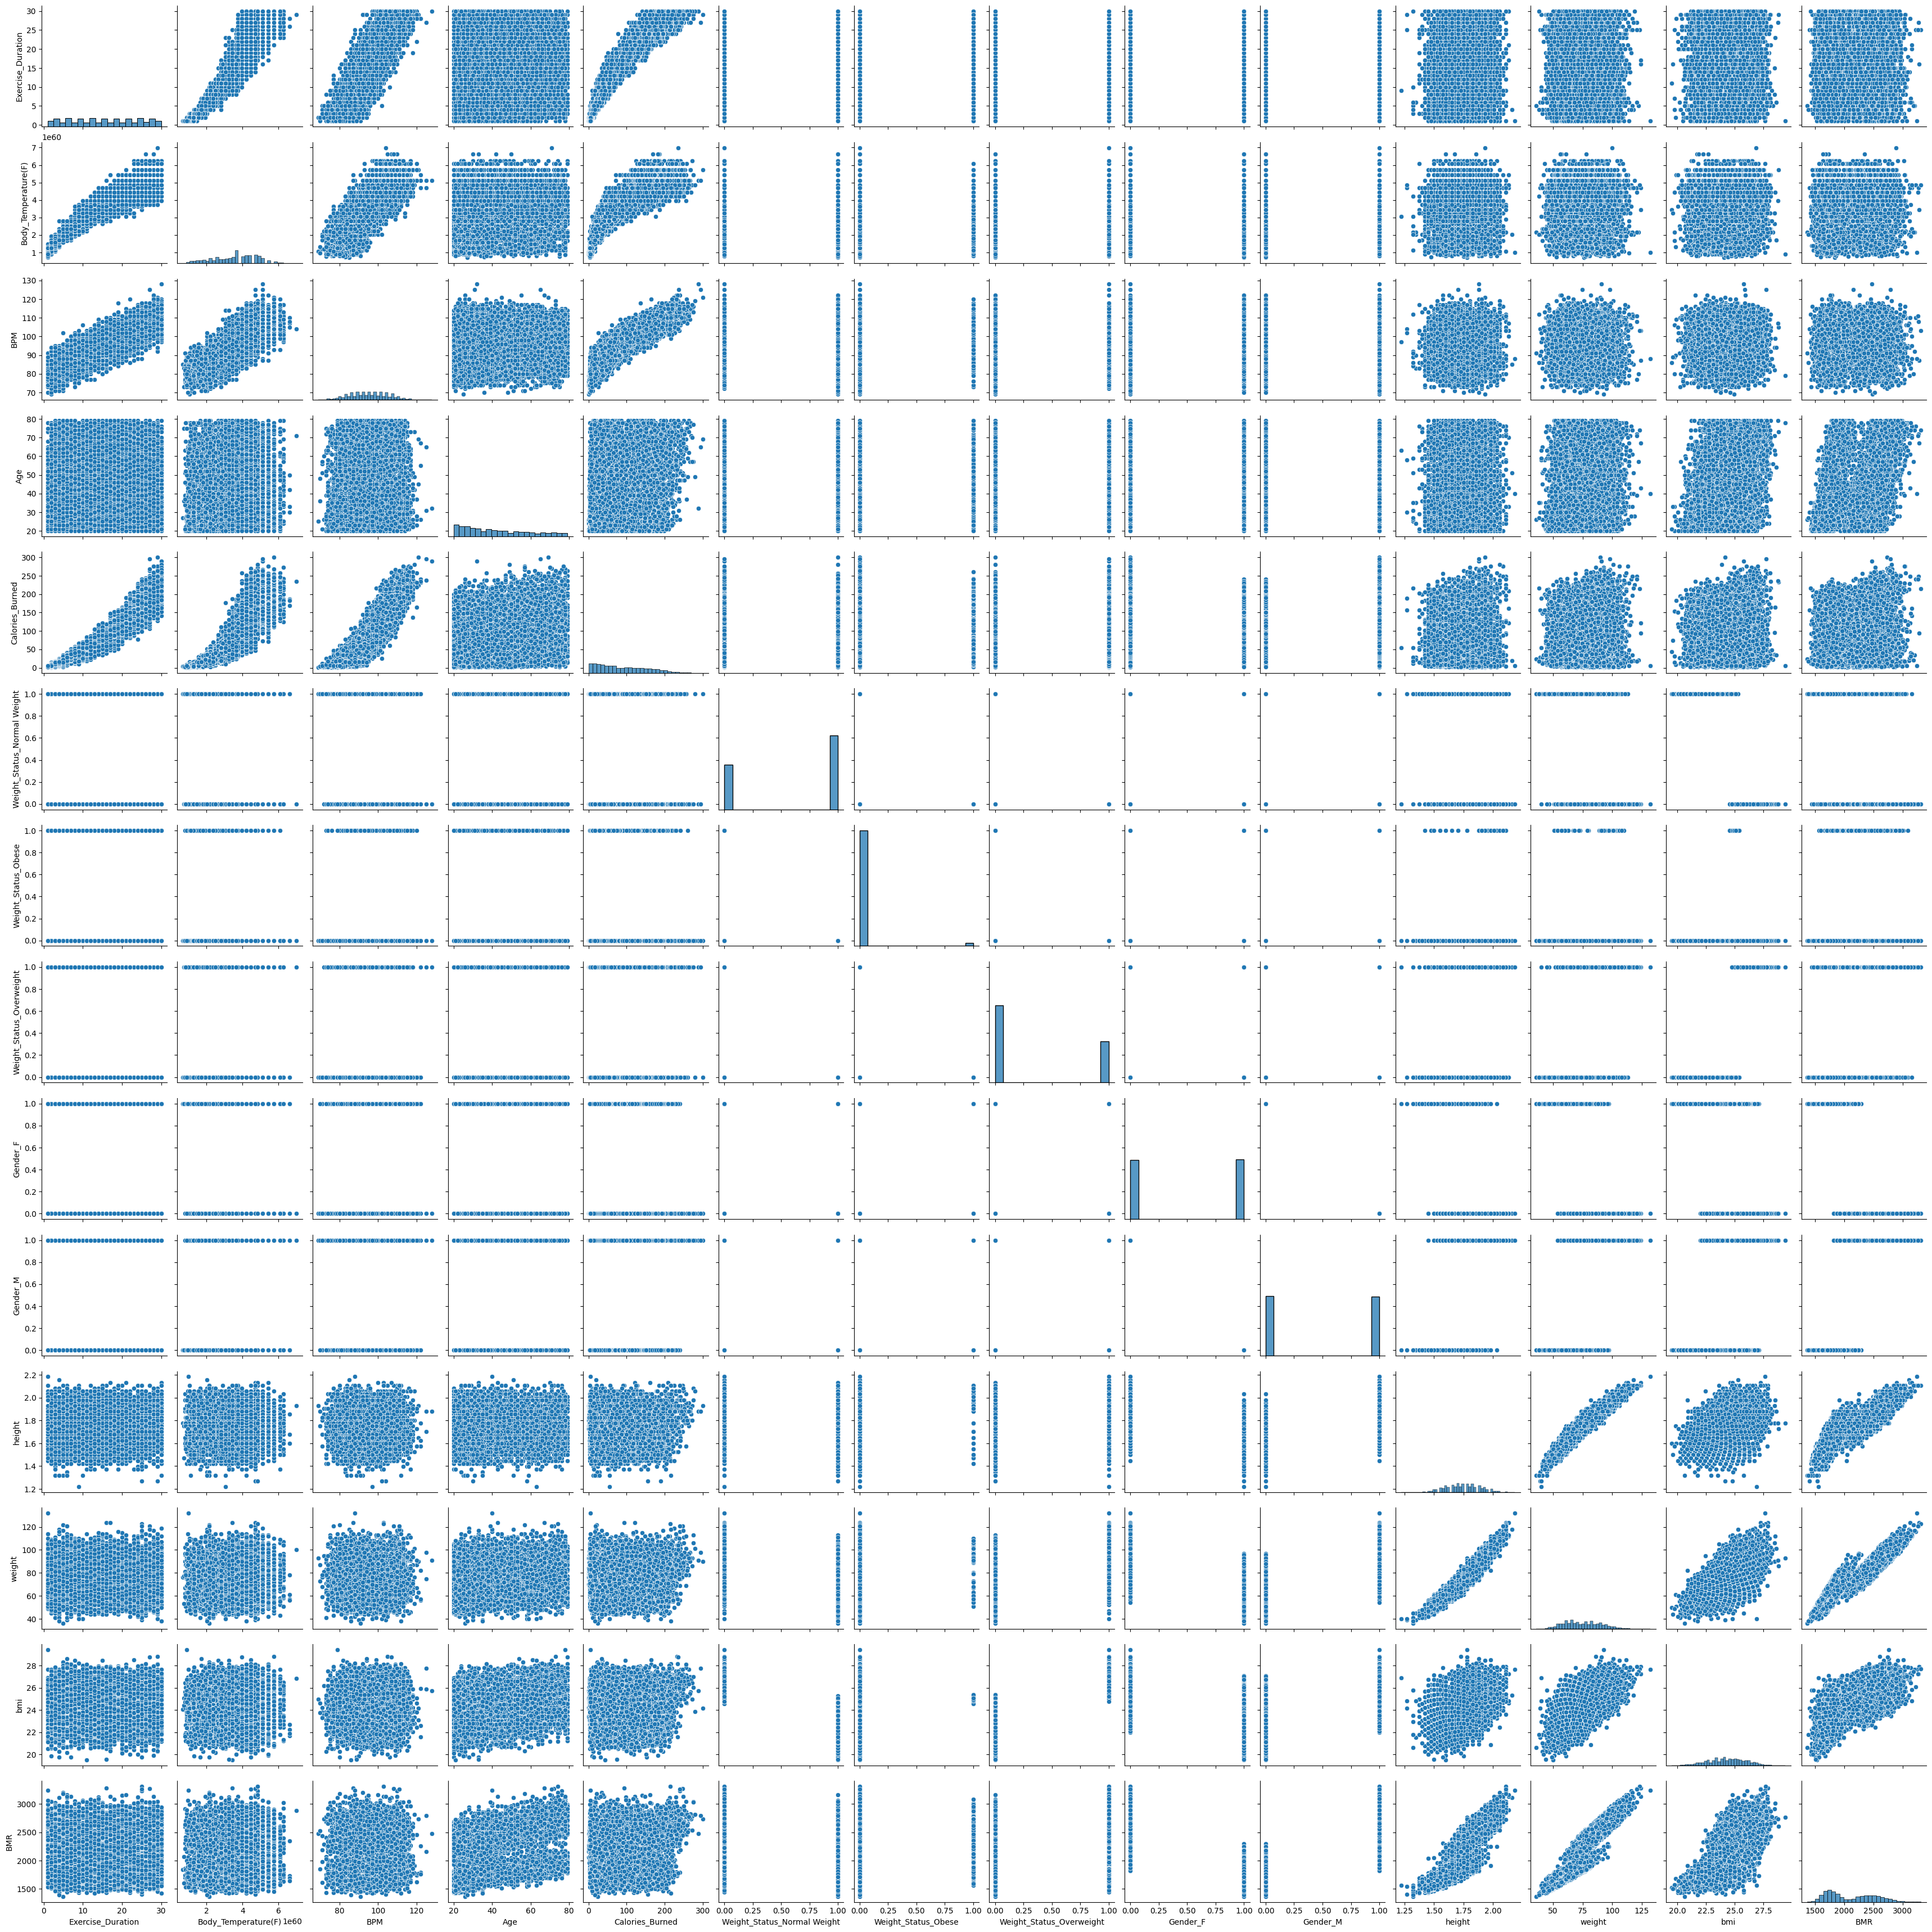

In [23]:
sns.pairplot(train_df)
plt.show()